##MUHAMMAD SALMAN QURESHI
##I17-0282
##AI PROJECT COMVE(TASK1)

In [1]:
!pip install transformers~=2.11.0

     |████████████████████████████████| 675kB 12.4MB/s 
     |████████████████████████████████| 3.8MB 52.6MB/s 
     |████████████████████████████████| 890kB 51.3MB/s 
     |████████████████████████████████| 1.1MB 40.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=a207eb53d231c22a9a18ffe28c7fc453fa33bec9d8ffdbb6b19ede7e4ca812e5
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

device = torch.device("cuda")

#LOADING TRAIN DATA

In [3]:
#%cd ..
#from google.colab import drive
#drive.mount('/content/gdrive')
#!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive/Ai_Project/"ALL data"/"Training  Data"/
#%cd /mydrive/Ai_Project/"ALL data"/"Training  Data"/
#!ls 
XTrain = pd.read_csv("./subtaskA_data_all.csv")
YTrain = pd.read_csv("./subtaskA_answers_all.csv")
xtrain = pd.DataFrame(np.zeros((20000, 2)),dtype=pd.StringDtype())
ind = 0
selected_columns = XTrain[["sent0","sent1"]]
print(xtrain)
for index, row in YTrain.iterrows():
  #print(index,row["id"],row["truthval"])
  #xtrain =
  tname = "sent"
  name = tname+ str(row["truthval"])
  name1 = tname + str(1-row["truthval"])
  
  
  xtrain.at[ind,0] = str(0)
  xtrain.at[ind,1] = selected_columns[name][index]
  xtrain.at[ind+1,0] = str(1)
  xtrain.at[ind+1,1] = selected_columns[name1][index]
  ind+=2

xtrain.columns = ["label","text"]
xtrain['label'] = xtrain['label'].astype(int) 
xtrain['text'] = xtrain['text'].astype(object) 
print(xtrain['label'])
print(xtrain["text"])
  

/
Mounted at /content/gdrive
/content/gdrive/My Drive/Ai_Project/ALL data/Training  Data
         0    1
0      0.0  0.0
1      0.0  0.0
2      0.0  0.0
3      0.0  0.0
4      0.0  0.0
...    ...  ...
19995  0.0  0.0
19996  0.0  0.0
19997  0.0  0.0
19998  0.0  0.0
19999  0.0  0.0

[20000 rows x 2 columns]
0        0
1        1
2        0
3        1
4        0
        ..
19995    1
19996    0
19997    1
19998    0
19999    1
Name: label, Length: 20000, dtype: int64
0                    He poured orange juice on his cereal.
1                            He poured milk on his cereal.
2                                         He drinks apple.
3                                          He drinks milk.
4                             Jeff ran 100,000 miles today
                               ...                        
19995    Harry went to the barbershop to have his hair cut
19996                     Reilly is sleeping on the window
19997                      Reilly is sleeping on the couch


#LOADING TEST DATA

In [4]:
#%cd ..
#%cd /mydrive/Ai_Project/"ALL data"/"Test Data"/
#!ls
XTest = pd.read_csv("./subtaskA_test_data.csv")
xtest = pd.DataFrame(np.zeros((len(XTest.index), 2)),dtype=pd.StringDtype())
ind = 0
TestId = XTest[["id"]]
TestSent0 = XTest[["sent0"]]
TestSent1 = XTest[["sent1"]]
TestId = TestId.astype('int64')
TestSent0 = TestSent0.astype(object) 
TestSent1 = TestSent1.astype(object)
TestSent0 = TestSent0.squeeze()
TestSent1 =TestSent1.squeeze()

/content/gdrive/My Drive/Ai_Project/ALL data
/content/gdrive/My Drive/Ai_Project/ALL data/Test Data


In [5]:
# check class distribution
xtrain['label'].value_counts(normalize = True)

1    0.5
0    0.5
Name: label, dtype: float64

In [6]:
train_text, temp_text, train_labels, temp_labels = train_test_split(xtrain['text'], xtrain['label'], 
                                                                    
                                                                    test_size=0.4, 
                                                                    stratify=xtrain['label'])

val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

In [7]:
bert = AutoModel.from_pretrained('bert-base-uncased')

tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

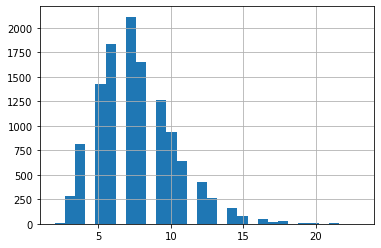

In [8]:
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [9]:
max_seq_len = 25

In [10]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the Sent0 set
tokens_sent0 = tokenizer.batch_encode_plus(
    TestSent0.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the Sent1 set
tokens_sent1 = tokenizer.batch_encode_plus(
    TestSent1.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

In [11]:
#CONVERTING TO TENSORS
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_labels = train_labels.astype(int)
train_y = torch.tensor(train_labels.tolist())

# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_labels = val_labels.astype(int)
val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_labels = test_labels.astype(int)
test_y = torch.tensor(test_labels.tolist())

# for sent0
test_seq_0 = torch.tensor(tokens_sent0['input_ids'])
test_mask_0 = torch.tensor(tokens_sent0['attention_mask'])

# for sent1
test_seq_1 = torch.tensor(tokens_sent1['input_ids'])
test_mask_1 = torch.tensor(tokens_sent1['attention_mask'])

# Create DataLoaders

In [12]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

train_data = TensorDataset(train_seq, train_mask, train_y)

train_sampler = RandomSampler(train_data)

train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_seq, val_mask, val_y)

val_sampler = SequentialSampler(val_data)

val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [13]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

# Define Model Architecture

In [14]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      self.dropout = nn.Dropout(0.1)
      
      self.relu =  nn.ReLU()

      self.fc1 = nn.Linear(768,512)
      
      self.fc2 = nn.Linear(512,2)

      self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, sent_id, mask):

      _, cls_hs = self.bert(sent_id, attention_mask=mask)
      
      x = self.fc1(cls_hs)

      x = self.relu(x)
    
      x = self.dropout(x)
  
      x = self.fc2(x)
      x = self.dropout(x)
   
      x = self.softmax(x)

      return x

In [15]:
#%cd ..
#%cd /mydrive/Ai_Project/"ALL data"/"Training  Data"/
#!ls

/content/gdrive/My Drive/Ai_Project/ALL data
/content/gdrive/My Drive/Ai_Project/ALL data/Training  Data
saved_weights_lol.pt	subtaskA_answers_all.csv  subtaskC_answers_all.csv
saved_weights.pt	subtaskA_data_all.csv	  subtaskC_data_all.csv
subtaskA_answers_0.csv	subtaskB_answers_all.csv
subtaskA_answers_1.csv	subtaskB_data_all.csv


In [16]:
model = BERT_Arch(bert)

model = model.to(device)

In [17]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr =  1e-5)

In [18]:
from sklearn.utils.class_weight import compute_class_weight

class_wts = compute_class_weight('balanced', np.unique(train_labels), train_labels)

print(class_wts)

[1. 1.]


In [19]:
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)

cross_entropy  = nn.NLLLoss(weight=weights) 



In [20]:
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  total_preds=[]
  
  for step,batch in enumerate(train_dataloader):
    
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch

    model.zero_grad()        

    preds = model(sent_id, mask)

    loss = cross_entropy(preds, labels)

    total_loss = total_loss + loss.item()

    loss.backward()

    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    optimizer.step()

    preds=preds.detach().cpu().numpy()

    total_preds.append(preds)

  avg_loss = total_loss / len(train_dataloader)
  
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [21]:
def evaluate():
  
  print("\nEvaluating...")
  
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  total_preds = []

  for step,batch in enumerate(val_dataloader):
    
    if step % 50 == 0 and not step == 0:
      
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    with torch.no_grad():
      
      preds = model(sent_id, mask)

      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  avg_loss = total_loss / len(val_dataloader) 

  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [22]:
def trainer(loss,Epoch):
  best_valid_loss = loss

  train_losses=[]
  valid_losses=[]

  for epoch in range(Epoch,Epoch+1500):
      
      print('\n Epoch {:} / {:}'.format(epoch + 1, Epoch+1500))
      
      train_loss, _ = train()
      
      valid_loss, _ = evaluate()
      
      if valid_loss < best_valid_loss:
          best_valid_loss = valid_loss
          torch.save({
              'epoch': epoch,
              'model_state_dict': model.state_dict(),
              'optimizer_state_dict': optimizer.state_dict(),
              'loss': best_valid_loss
              }, 'saved_weights.pt')
      
      if(epoch % 50 == 0): 
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': best_valid_loss
            }, 'saved_weights_lol.pt')
      
      train_losses.append(train_loss)
      valid_losses.append(valid_loss)
      
      print(f'\nTraining Loss: {train_loss:.3f}')
      print(f'Validation Loss: {valid_loss:.3f}')

In [23]:
#Load from the Last Epoch 
#checkpoint = torch.load('saved_weights_lol.pt')
#model.load_state_dict(checkpoint['model_state_dict'])
##optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
#epoch = checkpoint['epoch']
#loss = checkpoint['loss']

#FOR TRAINING
#trainer(loss,epoch)



 Epoch 3351 / 4850
  Batch    50  of    375.
  Batch   100  of    375.
  Batch   150  of    375.


KeyboardInterrupt: ignored

function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)

# Load Saved Model 

In [32]:
#load weights of best model
checkpoint = torch.load('saved_weights.pt')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']
print(epoch)
print(loss)

2851
0.5906096062761672


# Get Predictions for Test Data

In [33]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [34]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      2000
           1       0.62      0.62      0.62      2000

    accuracy                           0.62      4000
   macro avg       0.62      0.62      0.62      4000
weighted avg       0.62      0.62      0.62      4000



In [35]:
# confusion matrix
pd.crosstab(test_y, preds)

col_0,0,1
row_0,,
0,1245,755
1,756,1244


#GETTING SENT0 PREDICTIONS

In [36]:
# get predictions for test data
with torch.no_grad():
  preds0 = model(test_seq_0.to(device), test_mask_0.to(device))
  preds0 = preds0.detach().cpu().numpy()

preds0 = np.argmax(preds0, axis = 1)

#GETTING SENT1 PREDICTIONS

In [37]:
# get predictions for test data
with torch.no_grad():
  preds1 = model(test_seq_1.to(device), test_mask_1.to(device))
  preds1 = preds1.detach().cpu().numpy()

preds1 = np.argmax(preds1, axis = 1)

#Uploading Prediction Files

In [38]:
print(TestId)
tempDf = pd.DataFrame(columns=['Preds'])
#tempDf['id'] = TestId['id']
finalDfbias0 = pd.concat([TestId,tempDf],axis=1)
finalDfbias1 = pd.concat([TestId,tempDf],axis=1)

for index, row in finalDfbias0.iterrows():
  if(preds0[index] == 0):
    finalDfbias0.at[index,'Preds'] = 0
  else:
    finalDfbias0.at[index,'Preds'] = 1
  if(preds1[index] == 0):
    finalDfbias1.at[index,'Preds'] = 1
  else:
    finalDfbias1.at[index,'Preds'] = 0
    
print(finalDfbias0)
finalDfbias0.to_csv('subtaskA_answers.csv',header=None,index=False)
#finalDfbias1.to_csv('subtaskA_answers_1.csv',header=None,index=False)

#!cp subtaskA_answers_0.csv "/mydrive/Ai_Project/"

#!cp subtaskA_answers_1.csv "/mydrive/Ai_Project/"


       id
0    1175
1     452
2     275
3     869
4      50
..    ...
995  1114
996     8
997  1945
998  1053
999  1123

[1000 rows x 1 columns]
       id Preds
0    1175     0
1     452     0
2     275     1
3     869     1
4      50     1
..    ...   ...
995  1114     0
996     8     1
997  1945     0
998  1053     0
999  1123     0

[1000 rows x 2 columns]
